<a href="https://colab.research.google.com/github/varshin99/assignment-data-challenge/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification, make_circles
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
seed = 42

# Create non-linear data with two features
X, y = make_circles(n_samples=5000, noise=0.5, factor=0.4, random_state=seed)

# Instantiate PolynomialFeatures to create new feature interactions
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create polynomial features
X_poly = poly.fit_transform(X)

# Generate additional noise features
np.random.seed(seed)  # for reproducibility
noise_features = np.random.randn(5000, 17)  # 17 noise features to make a total of 20

# Combine the polynomial features and noise features
X_expanded = np.hstack((X_poly, noise_features))

# Create a DataFrame
df_expanded = pd.DataFrame(X_expanded)
df_expanded['label'] = y

# Save the dataset with more features to a CSV file
df_expanded.to_csv("combined_circles_with_more_features.csv", index=False)


seed = 42

# Create non-linear data with two features
X, y = make_circles(n_samples=5000, noise=0.5, factor=0.4, random_state=seed)

# Instantiate PolynomialFeatures to create new feature interactions
poly = PolynomialFeatures(degree=4, include_bias=False)

# Create polynomial features
X_poly = poly.fit_transform(X)

# Generate additional noise features
np.random.seed(seed)  # for reproducibility
noise_features = np.random.randn(5000, 17)  # 17 noise features to make a total of 20

# Combine the polynomial features and noise features
X_expanded = np.hstack((X_poly, noise_features))

# Create a DataFrame
df_expanded = pd.DataFrame(X_expanded)
df_expanded['label'] = y

# Save the dataset with more features to a CSV file
df_expanded.to_csv("combined_circles_with_more_features.csv", index=False)


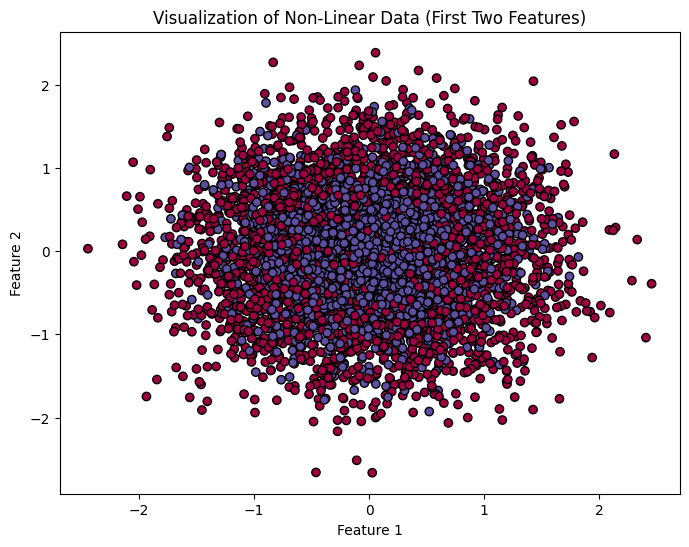

In [ ]:
import matplotlib.pyplot as plt

# Visualize the original two features from the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("Visualization of Non-Linear Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


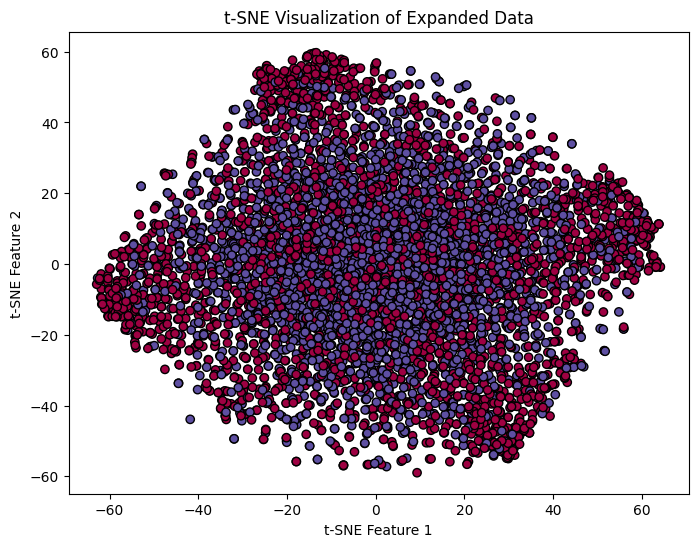

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE and reduce the dimension of the expanded dataset
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X_expanded)

# Visualize the t-SNE-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("t-SNE Visualization of Expanded Data")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()


                 0            1             2            3             4  \
count  5000.000000  5000.000000  5.000000e+03  5000.000000  5.000000e+03   
mean      0.000137    -0.003967  5.362677e-01    -0.002163  5.392774e-01   
std       0.732376     0.734418  6.992401e-01     0.519609  7.245291e-01   
min      -2.445124    -2.663642  4.339375e-07    -2.939769  5.392094e-08   
25%      -0.524953    -0.512529  6.064099e-02    -0.217489  5.774582e-02   
50%       0.003423    -0.001157  2.631302e-01    -0.000932  2.593473e-01   
75%       0.506927     0.506067  7.432351e-01     0.203298  7.238131e-01   
max       2.458242     2.386993  6.042954e+00     3.382620  7.094988e+00   

                  5            6            7             8            9  ...  \
count  5.000000e+03  5000.000000  5000.000000  5.000000e+03  5000.000000  ...   
mean   1.001770e-02    -0.009382     0.009260 -1.592372e-02    -0.003328  ...   
std    1.316142e+00     0.614017     0.613764  1.396862e+00     0.995403

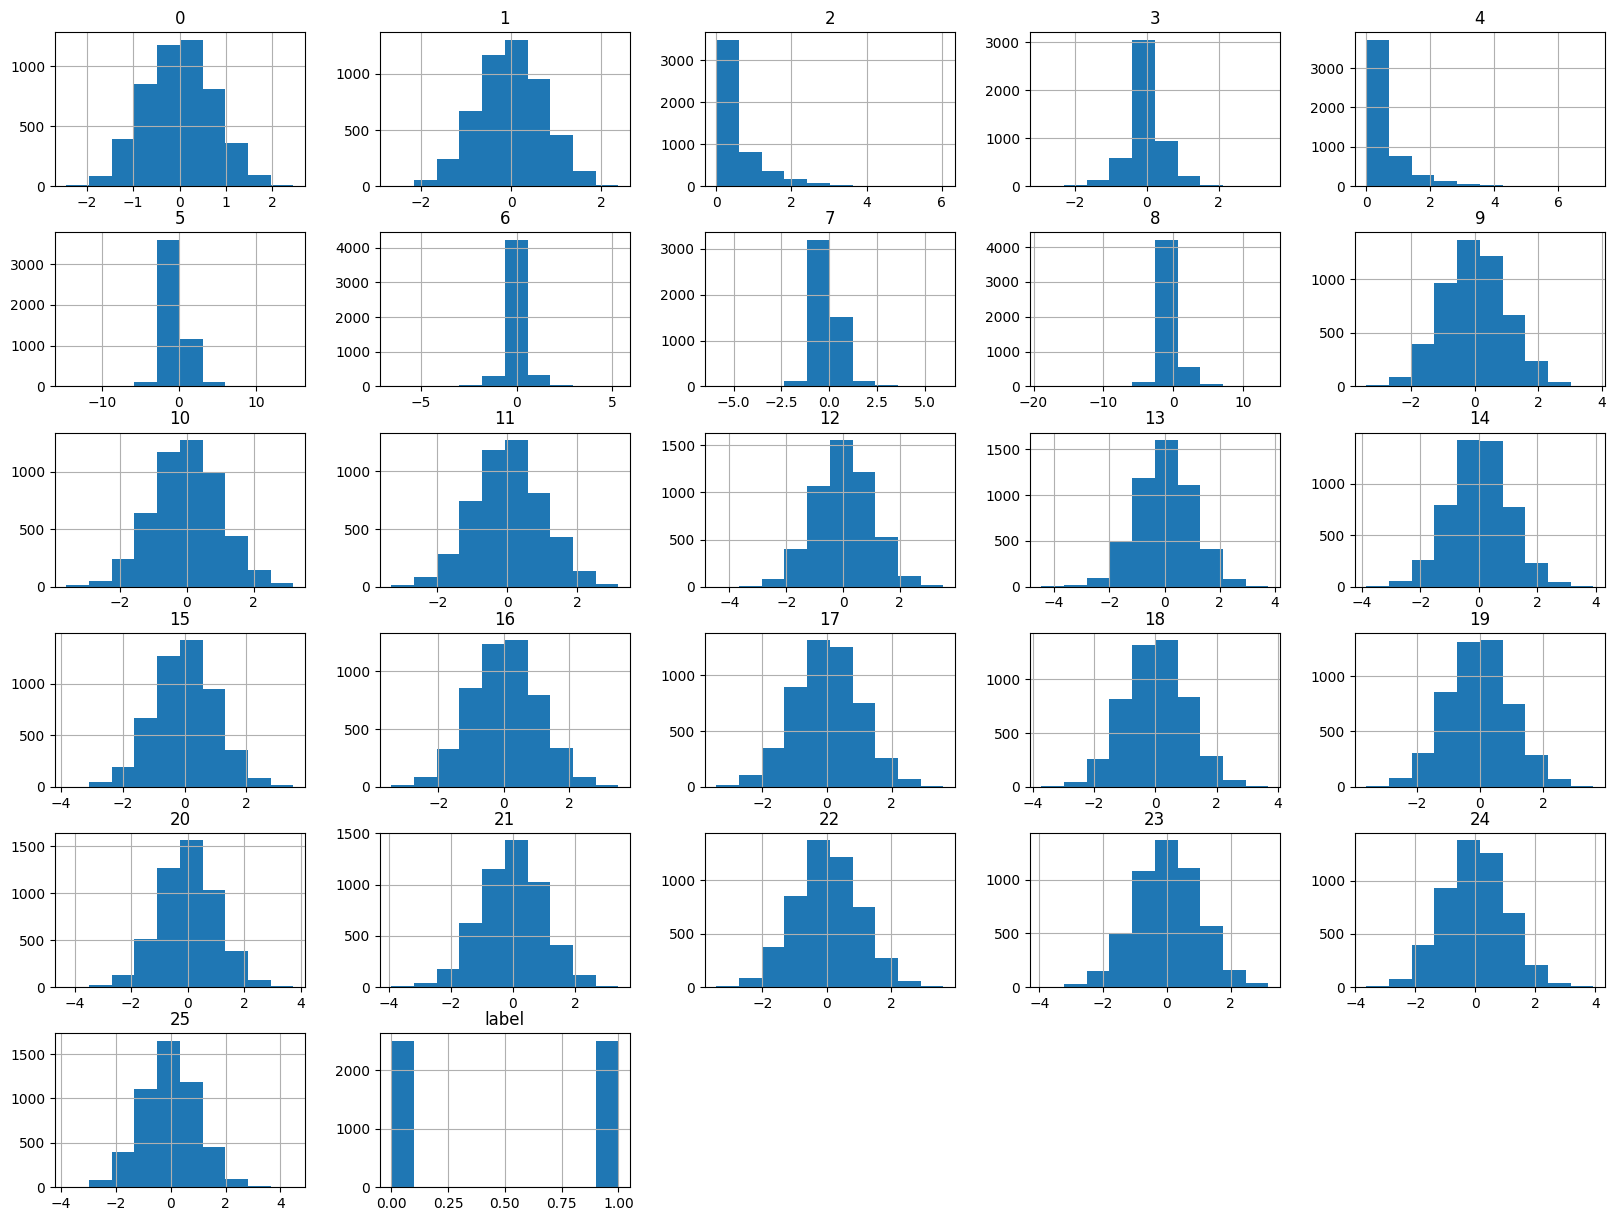

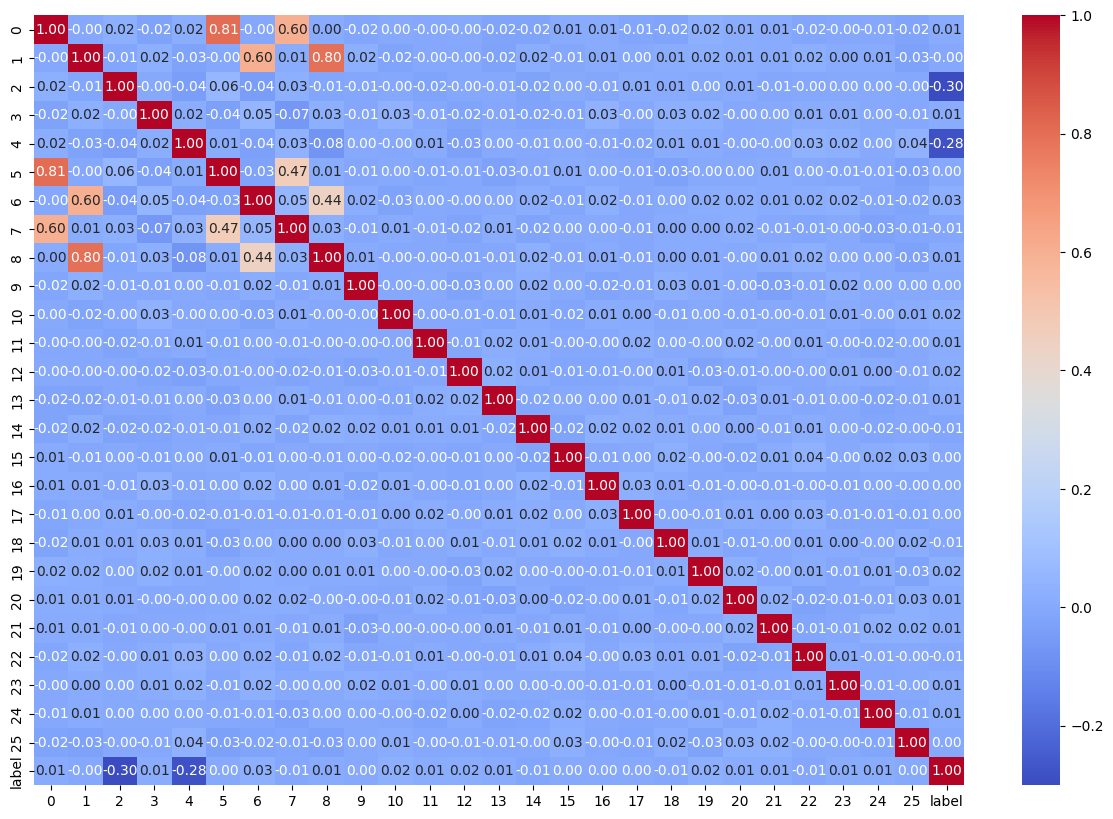

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
label    0
dtype: int64


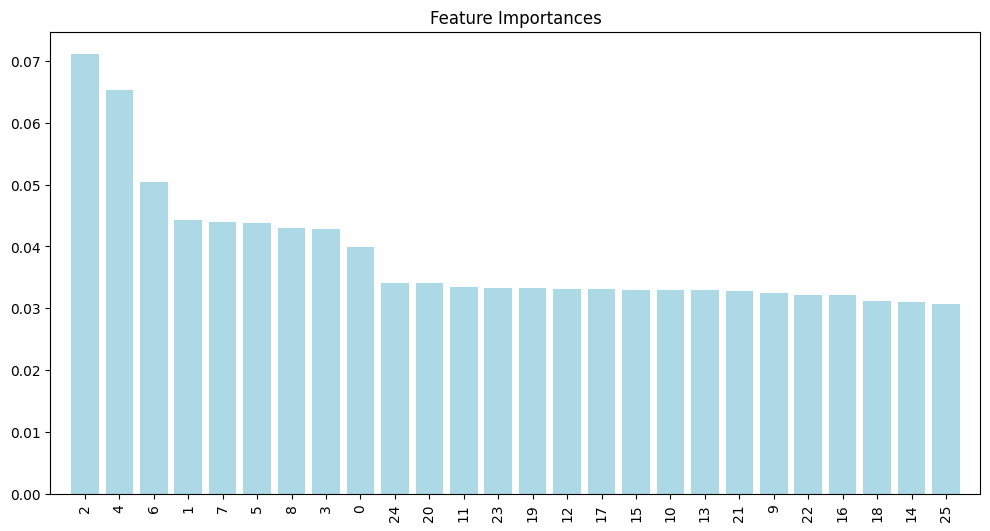

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv("combined_circles_with_more_features.csv")

# 1. Descriptive Statistics
print(df.describe())
print(df.info())

# 2. Data Distribution
df.hist(figsize=(20,15))
plt.show()

# 3. Correlation Analysis
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# 4. Check for Missing Values
print(df.isnull().sum())





# 8. Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(df.drop('label', axis=1), df['label'])
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(df.shape[1]-1), importances[indices], color='lightblue', align='center')
plt.xticks(range(df.shape[1]-1), df.columns[indices], rotation=90)
plt.xlim([-1, df.shape[1]-1])
plt.show()


In [ ]:

# Initialize random seed to ensure reproducible results
np.random.seed(42)

# Create a dataset that is linearly separable
X_separable, y_separable = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                                               n_clusters_per_class=1, class_sep=2, random_state=42)

# Create a dataset with a circular pattern
X_circular_pattern, y_circular_pattern = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Merge the linear and circular datasets
X_mixed = np.vstack((X_separable, X_circular_pattern))
y_mixed = np.hstack((y_separable, y_circular_pattern))

# Introduce noise to make classification with SVM more difficult
X_mixed += np.random.normal(loc=0, scale=0.2, size=X_mixed.shape)

# Prepare the mixed dataset for further operations
df_mixed = pd.DataFrame(X_mixed, columns=["feature_1", "feature_2"])
df_mixed['label'] = y_mixed

# Export the dataset with added noise to a CSV file, without altering the file name
df_mixed.to_csv("noisy_combined_blobs_classification_dataset.csv", index=False)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import pandas as pd

seed = 42  # Define your seed variable for reproducibility

# Read the datasets from CSV files
df1 = pd.read_csv("combined_circles_with_more_features.csv")
df2 = pd.read_csv("noisy_combined_blobs_classification_dataset.csv")

# Prepare the data and labels
X1 = df1.drop('label', axis=1).values
y1 = df1['label'].values
X2 = df2.drop('label', axis=1).values
y2 = df2['label'].values

# Initialize the Support Vector Machine and Decision Tree classifiers with default parameters
svm = SVC(kernel='linear',random_state=seed)
dt = DecisionTreeClassifier(random_state=seed)

# Evaluate the classifiers on the first dataset
f1_svm_1 = cross_val_score(svm, X1, y1, cv=5, scoring='f1_macro').mean()
f1_dt_1 = cross_val_score(dt, X1, y1, cv=5, scoring='f1_macro').mean()

# Evaluate the classifiers on the second dataset
f1_svm_2 = cross_val_score(svm, X2, y2, cv=5, scoring='f1_macro').mean()
f1_dt_2 = cross_val_score(dt, X2, y2, cv=5, scoring='f1_macro').mean()

# Output the results
print(f"Dataset 1 - SVM F1: {f1_svm_1}, Decision Tree F1: {f1_dt_1}")
print(f"Dataset 2 - SVM F1: {f1_svm_2}, Decision Tree F1: {f1_dt_2}")
print("Difference in F1-score on Dataset 1:", f1_svm_1 - f1_dt_1)
print("Difference in F1-score on Dataset 2:", f1_dt_2 - f1_svm_2)


Dataset 1 - SVM F1: 0.6879130357675212, Decision Tree F1: 0.5946253033598848
Dataset 2 - SVM F1: 0.7492514491412396, Decision Tree F1: 0.8845215072451017
Difference in F1-score on Dataset 1: 0.09328773240763633
Difference in F1-score on Dataset 2: 0.13527005810386206
